Saving zenodo_labeled.csv to zenodo_labeled (1).csv
Dosya: zenodo_labeled (1).csv
İlk 5 satır:


,text,clean_text,predicted_label
0,A post claims compulsory vacination violates t...,post claims compulsory vacination violates pri...,negative
1,A photo claims that this person is a doctor wh...,photo claims person doctor died attending many...,negative
2,Post about a video claims that it is a protest...,post video claims protest confination town ara...,positive
3,All deaths by respiratory failure and pneumoni...,deaths respiratory failure pneumonia registere...,negative
4,The dean of the College of Biologists of Euska...,dean college biologists euskadi states lot pcr...,negative


Veri şekli: (10201, 3)
Kolonlar: ['text', 'clean_text', 'predicted_label']
ZENODO LABELED veri seti algılandı (3 sınıflı duygu sınıflandırma).
Sınıflar: ['negative' 'positive']
TF-IDF vektör boyutu: (10201, 5000)


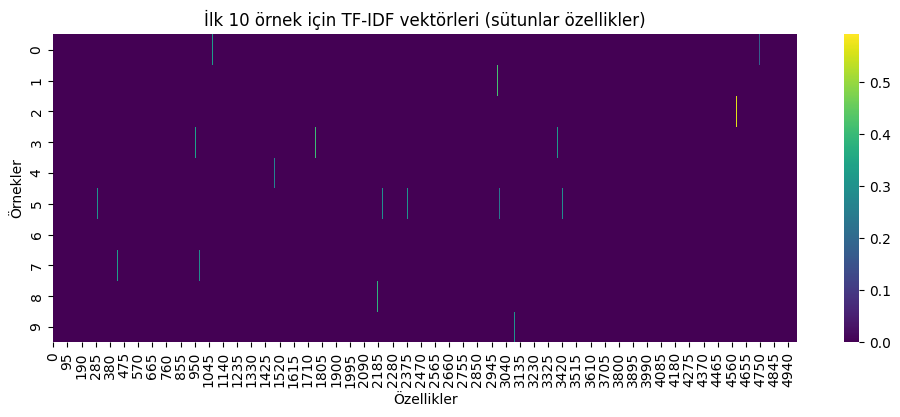

Ölçeklenmiş veri şekli: (10201, 5000)
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 376ms/step - loss: 0.1643
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 544ms/step - loss: 6.8429e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - loss: 6.8346e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 378ms/step - loss: 6.8279e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 403ms/step - loss: 6.8421e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - loss: 6.8189e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 389ms/step - loss: 6.8312e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 378ms/step - loss: 6.8196e-04
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 384ms/step - loss: 6.8679e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 420ms/step - loss: 6.8450e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 404ms/step - loss: 6.8430e-04
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 412ms/step - loss: 6.8311e-04
Epoch 13/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 466ms/step - loss: 6.8416e-04
Epoch 14/20
40/40 ━━━━━━━━

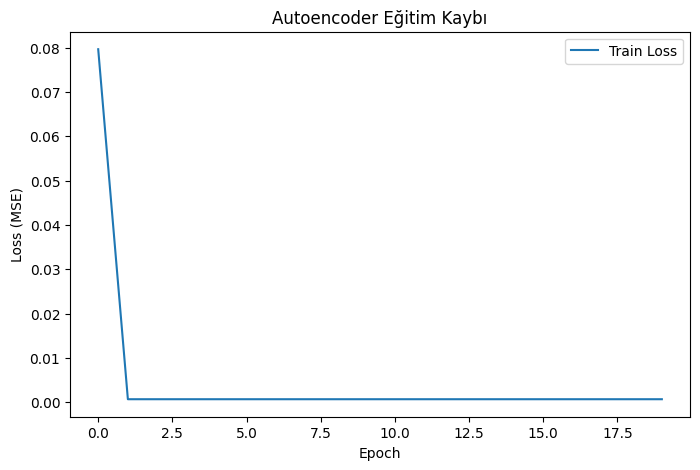

319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Düşük boyutlu temsillerin şekli: (10201, 32)


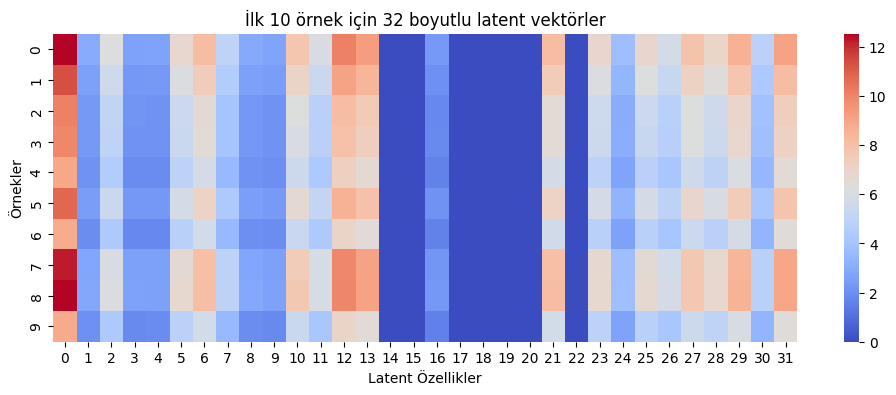

🔎 Logistic Regression Sonuçları:
              precision    recall  f1-score   support

    negative       0.54      0.20      0.29       898
    positive       0.58      0.87      0.69      1143

    accuracy                           0.57      2041
   macro avg       0.56      0.53      0.49      2041
weighted avg       0.56      0.57      0.52      2041



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from google.colab import files

# -- 1. Veri Yükleme ve Önizleme
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
print(f"Dosya: {filename}")
print("İlk 5 satır:")
display(df.head())
print(f"Veri şekli: {df.shape}")
print(f"Kolonlar: {list(df.columns)}")

# -- 2. Veri Setine Göre Ayarlamalar

if 'clean_text' in df.columns and 'predicted_label' in df.columns:
    print("ZENODO LABELED veri seti algılandı (3 sınıflı duygu sınıflandırma).")
    X_text = df['clean_text']
    y = df['predicted_label']
    classes = y.unique()
    print(f"Sınıflar: {classes}")

elif 'headlines' in df.columns and 'outcome' in df.columns:
    print("COVID Fake News veri seti algılandı (binary sınıflandırma).")
    X_text = df['headlines']
    y = df['outcome']
    classes = y.unique()
    print(f"Sınıflar: {classes}")

else:
    raise ValueError("Beklenmeyen veri seti formatı.")

# -- 3. TF-IDF Vektörleştirme

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X_text).toarray()
print(f"TF-IDF vektör boyutu: {X_tfidf.shape}")

# -- 4. Vektör Görselleştirme (birkaç örnek)

plt.figure(figsize=(12,4))
sns.heatmap(X_tfidf[:10], cmap='viridis', cbar=True)
plt.title("İlk 10 örnek için TF-IDF vektörleri (sütunlar özellikler)")
plt.xlabel("Özellikler")
plt.ylabel("Örnekler")
plt.show()

# -- 5. Ölçekleme

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_tfidf)
print(f"Ölçeklenmiş veri şekli: {X_scaled.shape}")

# -- 6. Autoencoder Mimarisi

input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(1024, activation='relu')(input_layer)
encoded = Dense(256, activation='relu')(encoded)
latent = Dense(32, activation='relu')(encoded)  # 32 boyutlu latent uzay

decoded = Dense(256, activation='relu')(latent)
decoded = Dense(1024, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# -- 7. Model Eğitimi

early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          callbacks=[early_stop])



# -- 8. Eğitim Kaybı Grafiği

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Autoencoder Eğitim Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# -- 9. Encoder Modeliyle Boyut İndirgeme

encoder = Model(inputs=input_layer, outputs=latent)
X_reduced = encoder.predict(X_scaled)
print(f"Düşük boyutlu temsillerin şekli: {X_reduced.shape}")

# -- 10. Boyut İndirgeme Sonrası Görselleştirme (İlk 10 örnek)

plt.figure(figsize=(12,4))
sns.heatmap(X_reduced[:10], cmap='coolwarm', cbar=True)
plt.title("İlk 10 örnek için 32 boyutlu latent vektörler")
plt.xlabel("Latent Özellikler")
plt.ylabel("Örnekler")
plt.show()

# -- 11. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# -- 12. Logistic Regression ile Sınıflandırma

logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("🔎 Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred_logreg))


🔎 Support Vector Machine (SVM) Sonuçları:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       898
    positive       0.56      1.00      0.72      1143

    accuracy                           0.56      2041
   macro avg       0.28      0.50      0.36      2041
weighted avg       0.31      0.56      0.40      2041



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


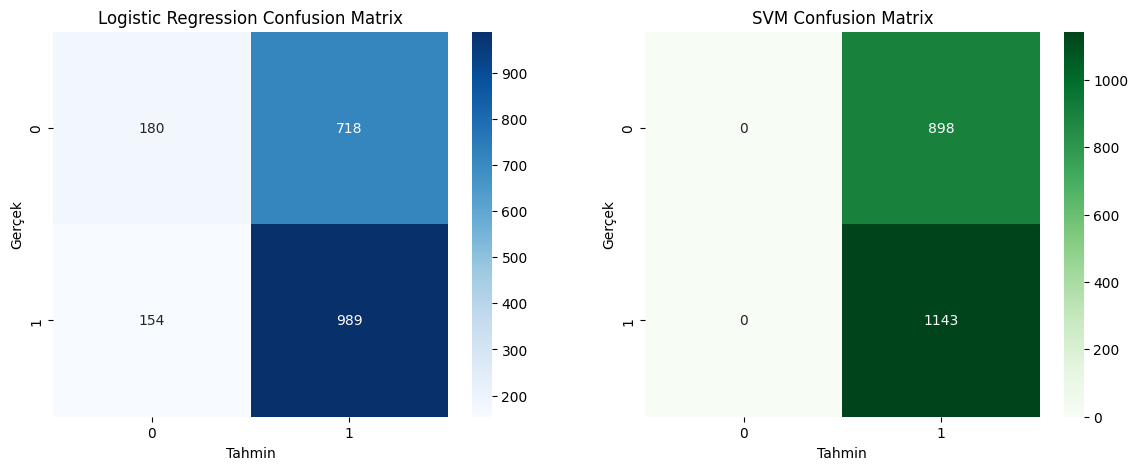

✅ Model ve dönüşümler kaydedildi.


In [3]:

# -- 13. SVM ile Sınıflandırma

SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("🔎 Support Vector Machine (SVM) Sonuçları:")
print(classification_report(y_test, y_pred_svm))

# -- 14. Confusion Matrix Görselleştirme

fig, axes = plt.subplots(1, 2, figsize=(14,5))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Tahmin")
axes[0].set_ylabel("Gerçek")

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Tahmin")
axes[1].set_ylabel("Gerçek")

plt.show()

# -- 15. TF-IDF ve Scaler Kaydetme

joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model ve dönüşümler kaydedildi.")


In [7]:
print(y.value_counts())


predicted_label
positive    5712
negative    4489
Name: count, dtype: int64


Saving zenodo_labeled.csv to zenodo_labeled (2).csv
Dosya: zenodo_labeled (2).csv
İlk 5 satır:


,text,clean_text,predicted_label
0,A post claims compulsory vacination violates t...,post claims compulsory vacination violates pri...,negative
1,A photo claims that this person is a doctor wh...,photo claims person doctor died attending many...,negative
2,Post about a video claims that it is a protest...,post video claims protest confination town ara...,positive
3,All deaths by respiratory failure and pneumoni...,deaths respiratory failure pneumonia registere...,negative
4,The dean of the College of Biologists of Euska...,dean college biologists euskadi states lot pcr...,negative


Veri şekli: (10201, 3)
Kolonlar: ['text', 'clean_text', 'predicted_label']
ZENODO LABELED veri seti algılandı (3 sınıflı duygu sınıflandırma).
Sınıf dağılımı:
predicted_label
positive    5712
negative    4489
Name: count, dtype: int64
TF-IDF vektör boyutu: (10201, 5000)
Ölçeklenmiş veri şekli: (10201, 5000)
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 402ms/step - loss: 0.1506
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 612ms/step - loss: 6.8315e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 404ms/step - loss: 6.8197e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 406ms/step - loss: 6.8581e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 387ms/step - loss: 6.8257e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 22s 417ms/step - loss: 6.8247e-04


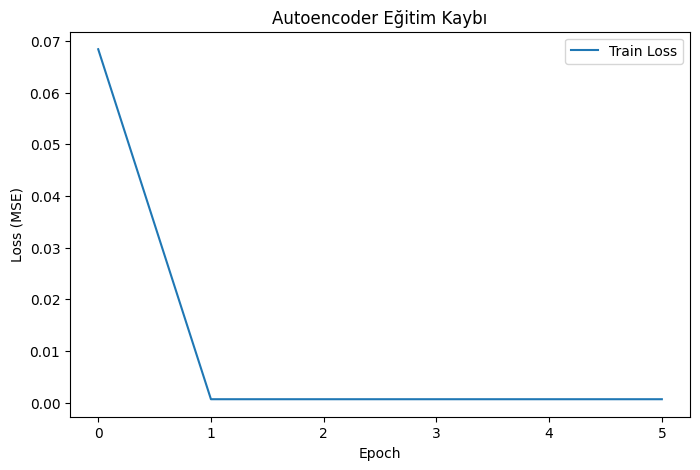

319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Düşük boyutlu temsillerin şekli: (10201, 128)
🔎 Logistic Regression Sonuçları:
              precision    recall  f1-score   support

    negative       0.55      0.62      0.58       898
    positive       0.67      0.60      0.63      1143

    accuracy                           0.61      2041
   macro avg       0.61      0.61      0.61      2041
weighted avg       0.62      0.61      0.61      2041

🔎 Support Vector Machine (SVM) Sonuçları:
              precision    recall  f1-score   support

    negative       0.56      0.60      0.58       898
    positive       0.67      0.63      0.65      1143

    accuracy                           0.61      2041
   macro avg       0.61      0.61      0.61      2041
weighted avg       0.62      0.61      0.62      2041



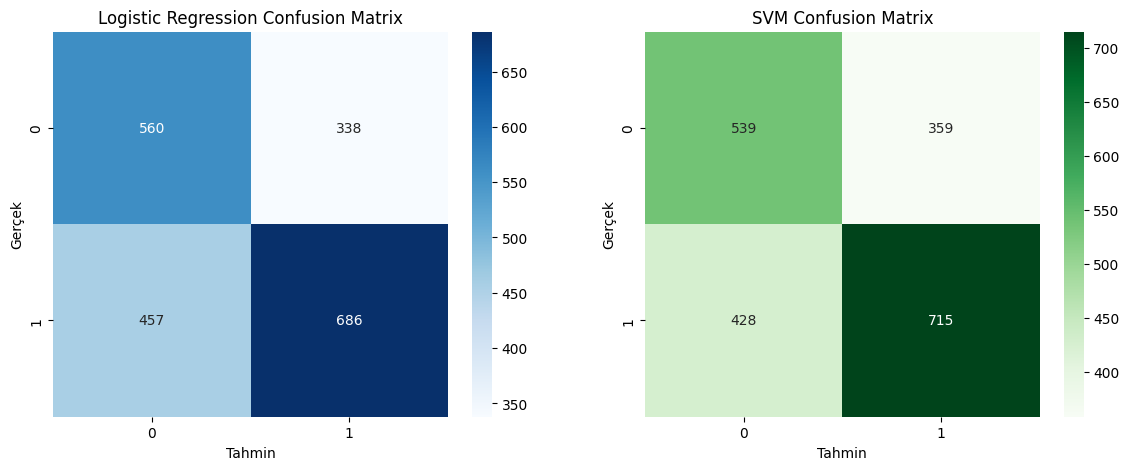

✅ Model ve dönüşümler kaydedildi.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from google.colab import files

# -- 1. Veri Yükleme
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Eğer encoding sorunu çıkarsa encoding parametresi ekle
try:
    df = pd.read_csv(filename)
except UnicodeDecodeError:
    df = pd.read_csv(filename, encoding='ISO-8859-1')

print(f"Dosya: {filename}")
print("İlk 5 satır:")
display(df.head())
print(f"Veri şekli: {df.shape}")
print(f"Kolonlar: {list(df.columns)}")

# -- 2. Veri Seti Ayarları
if 'clean_text' in df.columns and 'predicted_label' in df.columns:
    print("ZENODO LABELED veri seti algılandı (3 sınıflı duygu sınıflandırma).")
    X_text = df['clean_text']
    y = df['predicted_label']
    print("Sınıf dağılımı:")
    print(y.value_counts())

elif 'headlines' in df.columns and 'outcome' in df.columns:
    print("COVID Fake News veri seti algılandı (binary sınıflandırma).")
    X_text = df['headlines']
    y = df['outcome']
    print("Sınıf dağılımı:")
    print(y.value_counts())

else:
    raise ValueError("Beklenmeyen veri seti formatı.")

# -- 3. TF-IDF Vektörleştirme
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X_text).toarray()
print(f"TF-IDF vektör boyutu: {X_tfidf.shape}")

# -- 4. Ölçekleme
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_tfidf)
print(f"Ölçeklenmiş veri şekli: {X_scaled.shape}")

# -- 5. Autoencoder Mimarisi (Latent boyut 128 olarak artırıldı)
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(1024, activation='relu')(input_layer)
encoded = Dense(256, activation='relu')(encoded)
latent = Dense(128, activation='relu')(encoded)  # 128 boyutlu latent uzay

decoded = Dense(256, activation='relu')(latent)
decoded = Dense(1024, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# -- 6. Model Eğitimi
early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          callbacks=[early_stop])

# -- 7. Eğitim Kaybı Grafiği
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Autoencoder Eğitim Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# -- 8. Encoder ile Boyut İndirgeme
encoder = Model(inputs=input_layer, outputs=latent)
X_reduced = encoder.predict(X_scaled)
print(f"Düşük boyutlu temsillerin şekli: {X_reduced.shape}")

# -- 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# -- 10. Logistic Regression (class_weight='balanced' eklendi)
logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("🔎 Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred_logreg))

# -- 11. SVM (class_weight='balanced' eklendi)
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("🔎 Support Vector Machine (SVM) Sonuçları:")
print(classification_report(y_test, y_pred_svm))

# -- 12. Confusion Matrix Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14,5))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Tahmin")
axes[0].set_ylabel("Gerçek")

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Tahmin")
axes[1].set_ylabel("Gerçek")

plt.show()

# -- 13. TF-IDF ve Scaler Kaydetme
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model ve dönüşümler kaydedildi.")


Veri seti şekli: (10201, 3)
                                                text  \
0  A post claims compulsory vacination violates t...   
1  A photo claims that this person is a doctor wh...   
2  Post about a video claims that it is a protest...   
3  All deaths by respiratory failure and pneumoni...   
4  The dean of the College of Biologists of Euska...   

                                          clean_text predicted_label  
0  post claims compulsory vacination violates pri...        negative  
1  photo claims person doctor died attending many...        negative  
2  post video claims protest confination town ara...        positive  
3  deaths respiratory failure pneumonia registere...        negative  
4  dean college biologists euskadi states lot pcr...        negative  
Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.1491 - val_loss: 6.8588e-04
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 6.8446e-04 - val_loss: 6.8588e-04
Epoch 3/50
51/51 ━━━━━━━

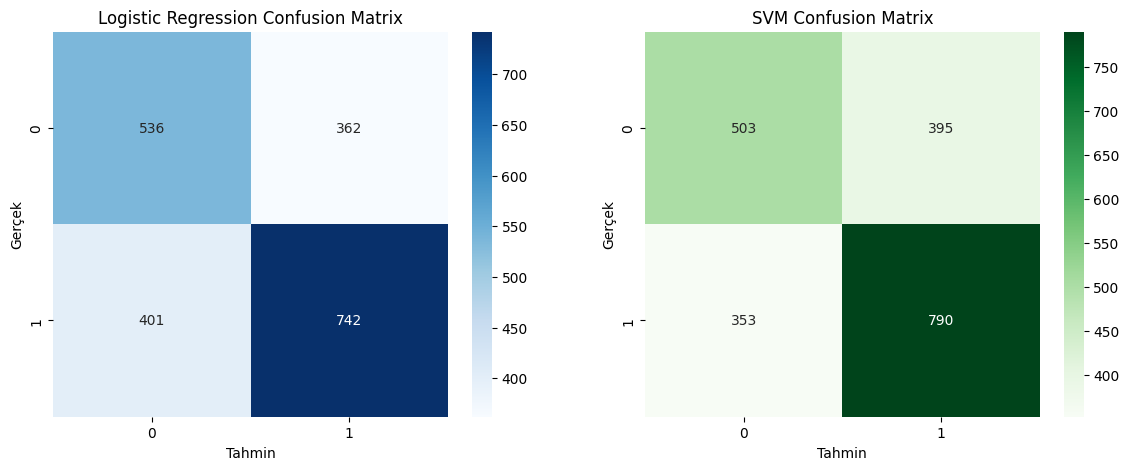

Model ve dönüşümler kaydedildi.


In [9]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Veri Yükleme
df = pd.read_csv('zenodo_labeled.csv')
print(f"Veri seti şekli: {df.shape}")
print(df.head())

# 2. Temel ön işleme (sadece örnek, detay eklenebilir)
df['clean_text'] = df['clean_text'].astype(str).str.lower()

# 3. TF-IDF Özellik Çıkarımı
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

# 4. MinMax Scaler ile ölçekleme
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_tfidf.toarray())

# 5. Encode etiketleri (positive=1, negative=0)
df['label'] = df['predicted_label'].apply(lambda x: 1 if x=='positive' else 0)
y = df['label']

# 6. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 7. Autoencoder Modeli Kurulumu
input_dim = X_train.shape[1]
encoding_dim = 128  # Önerilen boyut artırıldı

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(512, activation='relu')(input_layer)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)
encoder = models.Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# 8. Autoencoder Eğitimi
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

# 9. Encode edilmiş veriler
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# 10. Logistic Regression Modeli Eğitimi
logreg = LogisticRegression(class_weight='balanced', max_iter=500)
logreg.fit(X_train_encoded, y_train)
y_pred_logreg = logreg.predict(X_test_encoded)
print("Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred_logreg))

# 11. SVM Modeli Eğitimi
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train_encoded, y_train)
y_pred_svm = svm.predict(X_test_encoded)
print("SVM Sonuçları:")
print(classification_report(y_test, y_pred_svm))

# 12. Confusion Matrix Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14,5))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Tahmin")
axes[0].set_ylabel("Gerçek")

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Tahmin")
axes[1].set_ylabel("Gerçek")

plt.show()

# 13. Model ve Dönüşümleri Kaydetme
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(logreg, "logreg_model.pkl")
joblib.dump(svm, "svm_model.pkl")

print("Model ve dönüşümler kaydedildi.")


Veri seti şekli: (10201, 3)
                                                text  \
0  A post claims compulsory vacination violates t...   
1  A photo claims that this person is a doctor wh...   
2  Post about a video claims that it is a protest...   
3  All deaths by respiratory failure and pneumoni...   
4  The dean of the College of Biologists of Euska...   

                                          clean_text predicted_label  
0  post claims compulsory vacination violates pri...        negative  
1  photo claims person doctor died attending many...        negative  
2  post video claims protest confination town ara...        positive  
3  deaths respiratory failure pneumonia registere...        negative  
4  dean college biologists euskadi states lot pcr...        negative  
Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - loss: 0.1464 - val_loss: 6.8588e-04
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 6.8591e-04 - val_loss: 6.8588e-04
Epoch 3/20
51/51 ━━━━━━

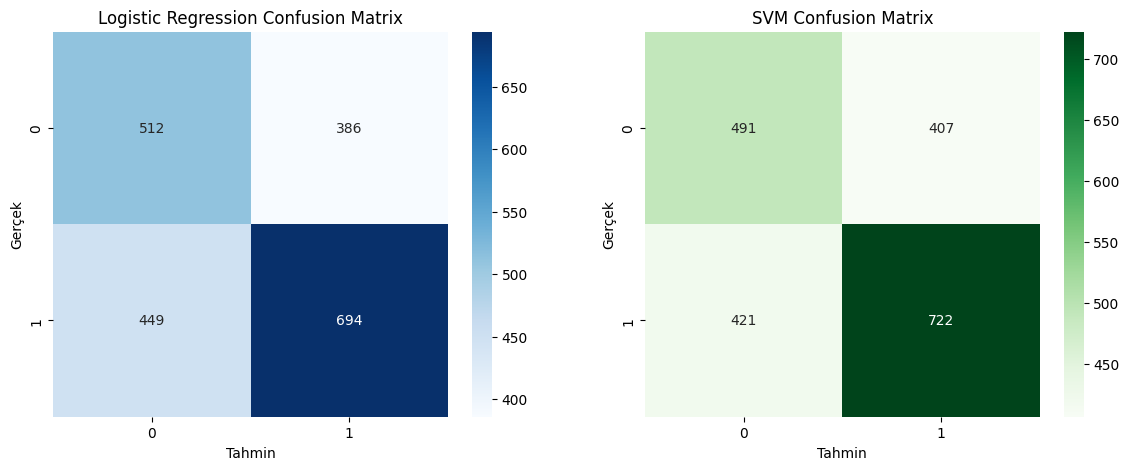

Model ve dönüşümler kaydedildi.


In [10]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import joblib
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Veri Yükleme
df = pd.read_csv('zenodo_labeled.csv')
print(f"Veri seti şekli: {df.shape}")
print(df.head())

# 2. Temel ön işleme (sadece örnek, detay eklenebilir)
df['clean_text'] = df['clean_text'].astype(str).str.lower()

# 3. TF-IDF Özellik Çıkarımı
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

# 4. MinMax Scaler ile ölçekleme
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_tfidf.toarray())

# 5. Encode etiketleri (positive=1, negative=0)
df['label'] = df['predicted_label'].apply(lambda x: 1 if x=='positive' else 0)
y = df['label']

# 6. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 7. Autoencoder Modeli Kurulumu
input_dim = X_train.shape[1]
encoding_dim = 128  # Önerilen boyut artırıldı

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(512, activation='relu')(input_layer)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(inputs=input_layer, outputs=decoded)
encoder = models.Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# 8. Autoencoder Eğitimi
history = autoencoder.fit(X_train, X_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_split=0.2,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

# 9. Encode edilmiş veriler

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# 10. Logistic Regression Modeli Eğitimi
logreg = LogisticRegression(class_weight='balanced', max_iter=500)
logreg.fit(X_train_encoded, y_train)
y_pred_logreg = logreg.predict(X_test_encoded)
print("Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred_logreg))

# 11. SVM Modeli Eğitimi
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train_encoded, y_train)
y_pred_svm = svm.predict(X_test_encoded)
print("SVM Sonuçları:")
print(classification_report(y_test, y_pred_svm))

# 12. Confusion Matrix Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14,5))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Tahmin")
axes[0].set_ylabel("Gerçek")

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Tahmin")
axes[1].set_ylabel("Gerçek")

plt.show()

# 13. Model ve Dönüşümleri Kaydetme
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(logreg, "logreg_model.pkl")
joblib.dump(svm, "svm_model.pkl")

print("Model ve dönüşümler kaydedildi.")


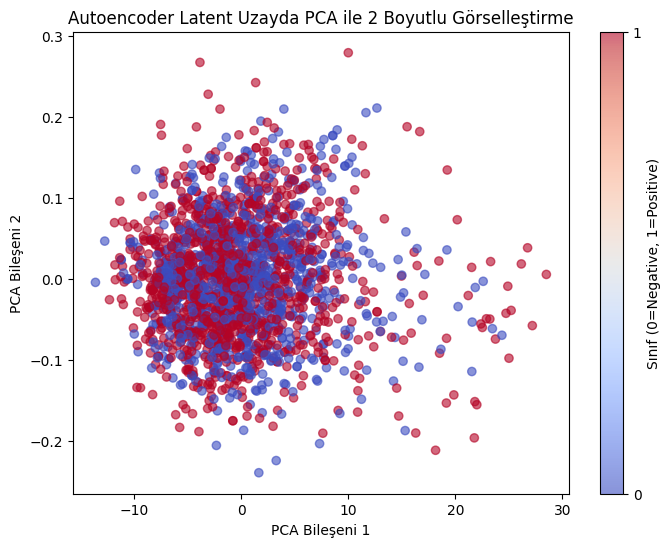

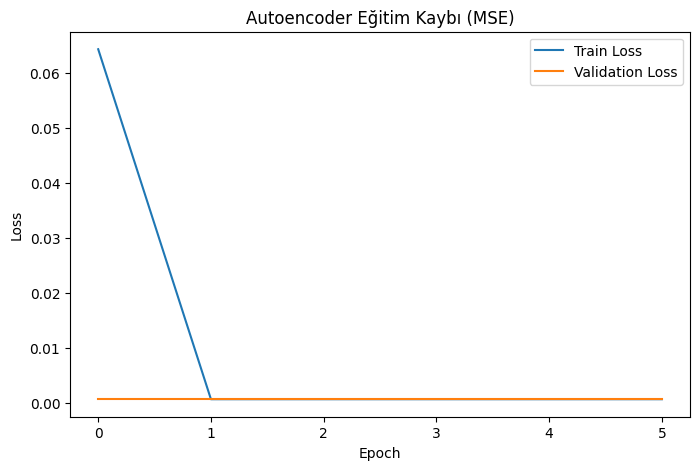

In [12]:
# --- Latent Uzayda PCA ile 2B görselleştirme ---

from sklearn.decomposition import PCA # PCA sınıfını import edin

pca = PCA(n_components=2)
X_latent_2d = pca.fit_transform(X_test_encoded)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_latent_2d[:,0], X_latent_2d[:,1], c=y_test, cmap='coolwarm', alpha=0.6)
plt.title("Autoencoder Latent Uzayda PCA ile 2 Boyutlu Görselleştirme")
plt.xlabel("PCA Bileşeni 1")
plt.ylabel("PCA Bileşeni 2")
plt.colorbar(scatter, ticks=[0,1], label='Sınıf (0=Negative, 1=Positive)')
plt.show()

# --- Eğitim Kaybı Grafiği ---

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Eğitim Kaybı (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saving zenodo_labeled.csv to zenodo_labeled (3).csv
Dosya: zenodo_labeled (3).csv
İlk 5 satır:


,text,clean_text,predicted_label
0,A post claims compulsory vacination violates t...,post claims compulsory vacination violates pri...,negative
1,A photo claims that this person is a doctor wh...,photo claims person doctor died attending many...,negative
2,Post about a video claims that it is a protest...,post video claims protest confination town ara...,positive
3,All deaths by respiratory failure and pneumoni...,deaths respiratory failure pneumonia registere...,negative
4,The dean of the College of Biologists of Euska...,dean college biologists euskadi states lot pcr...,negative


Veri şekli: (10201, 3)
Kolonlar: ['text', 'clean_text', 'predicted_label']
ZENODO LABELED veri seti algılandı (3 sınıflı duygu sınıflandırma).
Sınıflar: ['negative' 'positive']
TF-IDF vektör boyutu: (10201, 5000)


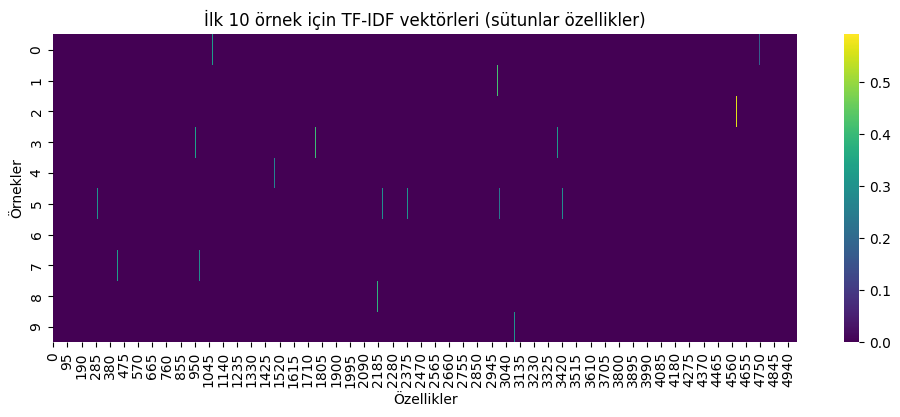

Ölçeklenmiş veri şekli: (10201, 5000)
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 405ms/step - loss: 0.1670
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 380ms/step - loss: 6.8291e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - loss: 6.8532e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 389ms/step - loss: 6.8373e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - loss: 6.8364e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 388ms/step - loss: 6.8365e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 390ms/step - loss: 6.8474e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 389ms/step - loss: 6.8306e-04
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - loss: 6.8477e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 387ms/step - loss: 6.8421e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 404ms/step - loss: 6.8479e-04


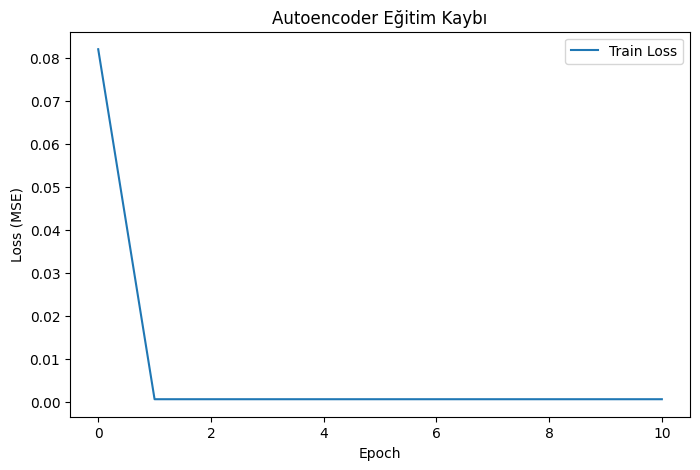

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Düşük boyutlu temsillerin şekli: (10201, 32)


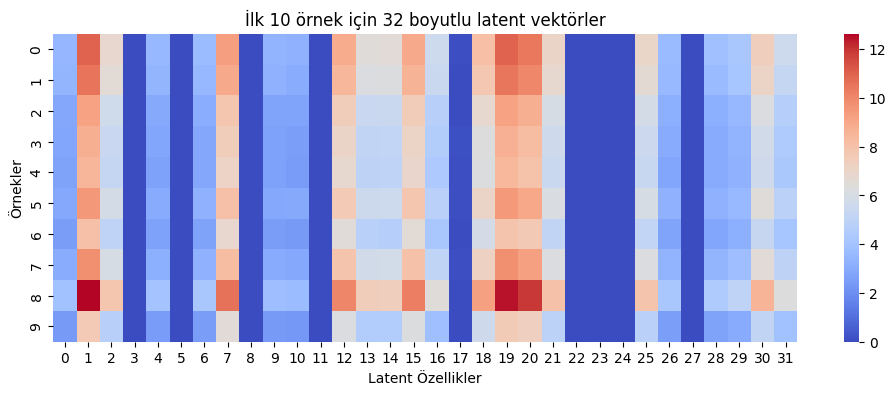

🔎 Logistic Regression Sonuçları:
              precision    recall  f1-score   support

    negative       0.60      0.19      0.29       898
    positive       0.59      0.90      0.71      1143

    accuracy                           0.59      2041
   macro avg       0.59      0.55      0.50      2041
weighted avg       0.59      0.59      0.53      2041



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from google.colab import files

# -- 1. Veri Yükleme ve Önizleme
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
print(f"Dosya: {filename}")
print("İlk 5 satır:")
display(df.head())
print(f"Veri şekli: {df.shape}")
print(f"Kolonlar: {list(df.columns)}")

# -- 2. Veri Setine Göre Ayarlamalar

if 'clean_text' in df.columns and 'predicted_label' in df.columns:
    print("ZENODO LABELED veri seti algılandı (3 sınıflı duygu sınıflandırma).")
    X_text = df['clean_text']
    y = df['predicted_label']
    classes = y.unique()
    print(f"Sınıflar: {classes}")

elif 'headlines' in df.columns and 'outcome' in df.columns:
    print("COVID Fake News veri seti algılandı (binary sınıflandırma).")
    X_text = df['headlines']
    y = df['outcome']
    classes = y.unique()
    print(f"Sınıflar: {classes}")

else:
    raise ValueError("Beklenmeyen veri seti formatı.")

# -- 3. TF-IDF Vektörleştirme

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X_text).toarray()
print(f"TF-IDF vektör boyutu: {X_tfidf.shape}")

# -- 4. Vektör Görselleştirme (birkaç örnek)

plt.figure(figsize=(12,4))
sns.heatmap(X_tfidf[:10], cmap='viridis', cbar=True)
plt.title("İlk 10 örnek için TF-IDF vektörleri (sütunlar özellikler)")
plt.xlabel("Özellikler")
plt.ylabel("Örnekler")
plt.show()

# -- 5. Ölçekleme

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_tfidf)
print(f"Ölçeklenmiş veri şekli: {X_scaled.shape}")

# -- 6. Autoencoder Mimarisi

input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(1024, activation='relu')(input_layer)
encoded = Dense(256, activation='relu')(encoded)
latent = Dense(32, activation='relu')(encoded)  # 32 boyutlu latent uzay

decoded = Dense(256, activation='relu')(latent)
decoded = Dense(1024, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# -- 7. Model Eğitimi

early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          callbacks=[early_stop])

# -- 8. Eğitim Kaybı Grafiği

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Autoencoder Eğitim Kaybı")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# -- 9. Encoder Modeliyle Boyut İndirgeme

encoder = Model(inputs=input_layer, outputs=latent)
X_reduced = encoder.predict(X_scaled)
print(f"Düşük boyutlu temsillerin şekli: {X_reduced.shape}")

# -- 10. Boyut İndirgeme Sonrası Görselleştirme (İlk 10 örnek)

plt.figure(figsize=(12,4))
sns.heatmap(X_reduced[:10], cmap='coolwarm', cbar=True)
plt.title("İlk 10 örnek için 32 boyutlu latent vektörler")
plt.xlabel("Latent Özellikler")
plt.ylabel("Örnekler")
plt.show()

# -- 11. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# -- 12. Logistic Regression ile Sınıflandırma

logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("🔎 Logistic Regression Sonuçları:")
print(classification_report(y_test, y_pred_logreg))


In [ ]:

# -- 13. SVM ile Sınıflandırma

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("🔎 Support Vector Machine (SVM) Sonuçları:")
print(classification_report(y_test, y_pred_svm))

# -- 14. Confusion Matrix Görselleştirme

fig, axes = plt.subplots(1, 2, figsize=(14,5))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Tahmin")
axes[0].set_ylabel("Gerçek")

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Tahmin")
axes[1].set_ylabel("Gerçek")

plt.show()

# -- 15. TF-IDF ve Scaler Kaydetme

joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model ve dönüşümler kaydedildi.")


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Latent vektörler X_reduced (32 boyutlu) olarak varsayılıyor
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=pd.Categorical(df['predicted_label']).codes, cmap='viridis', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=['negative', 'neutral', 'positive'])
plt.title("t-SNE ile 2D Veri Temsili")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()
